In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [38]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [39]:
X_train_full.shape

(60000, 28, 28)

In [40]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

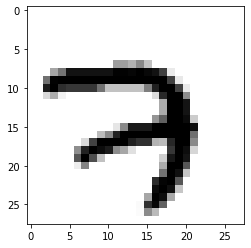

In [41]:
plt.imshow(X_train[0], cmap='binary')

In [42]:
y_train[0]

7

In [43]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=0.1),
    metrics=["accuracy"]
)

In [44]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [45]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
earlystopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
checkpoint_cb = keras.callbacks.ModelCheckpoint("mnist_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[earlystopping_cb, checkpoint_cb, tensorboard_cb])

Epoch 1/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2622 - accuracy: 0.9218 - val_loss: 0.1325 - val_accuracy: 0.9632
Epoch 2/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1091 - accuracy: 0.9666 - val_loss: 0.1029 - val_accuracy: 0.9698
Epoch 3/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0748 - accuracy: 0.9769 - val_loss: 0.0798 - val_accuracy: 0.9766
Epoch 4/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0554 - accuracy: 0.9823 - val_loss: 0.0818 - val_accuracy: 0.9762
Epoch 5/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.0691 - val_accuracy: 0.9798
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.0785 - val_accuracy: 0.9780
Epoch 7/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0233 - accuracy: 0.9931 - val_loss: 0.0681 - val_accuracy:

In [46]:
model = keras.models.load_model("mnist_model.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.0981


[0.06063200160861015, 0.09809999912977219]

In [49]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 63003), started 1 day, 2:44:46 ago. (Use '!kill 63003' to kill it.)